**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

Gere uma variável aleatória X com distribuição uniforme com 1000 amostras e intervalo [a,b] de sua escolha.

In [2]:
from scipy.stats import norm, uniform
import numpy as np
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
sns.set_theme()

In [13]:
# variavel aleatoria
a = 0.0
b = 3.0
X = uniform.rvs(loc=a, scale=b, size=1000)

**1. Selecione aleatoriamente $20$ amostras de $X$ e construa o intervalo de confiança para a média com 𝛼 = $5$%. Considere a variância conhecida, obtida da população de $1000$ amostras. Repita este procedimento e construa $50$ intervalos para a média. Plote os intervalos das médias junto com a média de $X$ e comente os resultados que obteve, comparando os intervalos estimados e verificando se eles contêm a média conhecida da população.**

In [5]:
varX = X.var()
varX

0.7537165924209078

In [14]:
# seleciono 20 valores aleatoriamente
sampleX = np.random.choice(X, size=20)
muX = sampleX.mean()
x = sorted(sampleX)

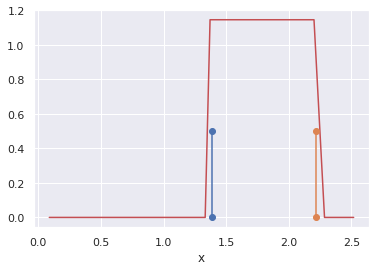

In [15]:
fig, ax = plt.subplots()
# calcula intervalo de confiança
ci = uniform.interval(0.95, loc=muX, scale=X.std())
#count, bins, _ = ax.hist(sampleX, density=True)
ax.plot(x, uniform.pdf(x, loc=muX, scale=X.std()), 'r')
# cnfidence interval left line
one_x12, one_y12 = [ci[0], ci[0]], [0, .5]
# cnfidence interval right line
two_x12, two_y12 = [ci[1], ci[1]], [0, .5]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
ax.set_xlabel("x");

In [16]:
n = 50
n_intervalos = []
cnts=0    
for i in range(n):
    xsample = np.random.choice(X, size=20, replace=False)
    ci = uniform.interval(0.95, loc=xsample.mean(), scale=X.std())
    n_intervalos.append(ci)
    if (muX>=ci[0] and muX<=ci[1]):
        cnts+=1

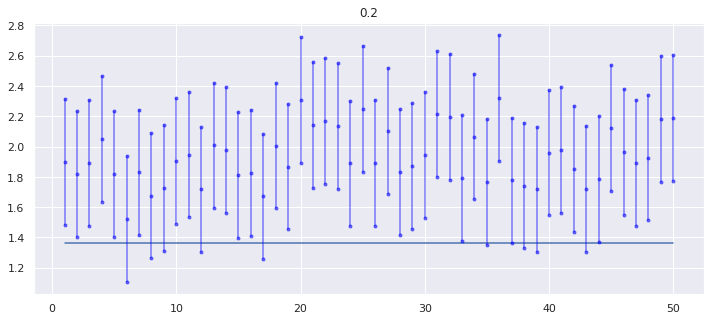

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
y = [muX for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
for i in intervalos:
    ypoints = [n_intervalos[i-1][0], np.mean(n_intervalos[i-1]), n_intervalos[i-1][1]]
    ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)
ax.set_title("{}".format(cnts/n));

Exemplo com desvio padrão desconhecido

https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

**2. Plote o histograma cumulativo das $50$ médias calculadas e compare com a cdf teórica da média amostral de $X$.**

In [29]:
medias = [np.mean(ci) for ci in n_intervalos]

In [34]:
pmedia = 1/50

In [54]:
x = np.linspace(np.min(medias), np.max(medias), num=50)

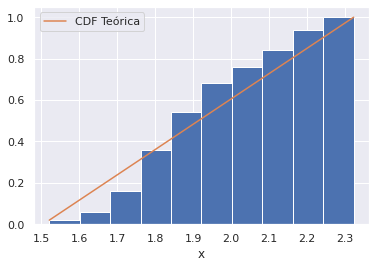

In [57]:
fig, ax = plt.subplots()
probs = [pmedia for _ in range(50)]
cdf = np.cumsum(probs)
ax.hist(medias,cumulative=True, density=True)
ax.plot(x, cdf, label="CDF Teórica")
ax.set_xlabel("x")
plt.legend();

**3. Repita a atividade $1$ considerando a variância desconhecida e compare os intervalos**

**4. Repita a atividade $1$ fazendo um intervalo de confiança para a variância da variável $X$ gerada com distribuição normal, média $\mu$ e variância $\sigma$ escolhidas. Faça o histograma das 50 variâncias e analise.**

In [69]:
X = norm.rvs(loc=5.0, scale=1.5, size=1000)

In [70]:
# seleciono 20 valores aleatoriamente
sampleX = np.random.choice(X, size=20)
muX = sampleX.mean()
x = sorted(sampleX)

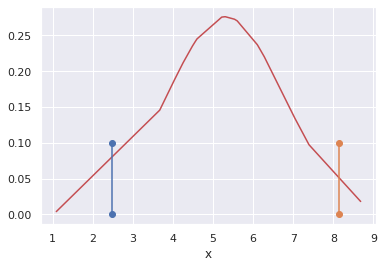

In [74]:
#count, bins, _ = ax.hist(sampleX, density=True)
fig, ax = plt.subplots()
ax.plot(x, norm.pdf(x, loc=muX, scale=X.std()), 'r')
# cnfidence interval left line
ci = norm.interval(0.95, loc=muX, scale=X.std())
one_x12, one_y12 = [ci[0], ci[0]], [0, .1]
# cnfidence interval right line
two_x12, two_y12 = [ci[1], ci[1]], [0, .1]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
ax.set_xlabel("x");

In [76]:
n = 50
n_intervalos_normal = []
cnts=0    
for i in range(n):
    xsample = np.random.choice(X, size=20, replace=False)
    ci = norm.interval(0.95, loc=xsample.mean(), scale=1.5)
    n_intervalos_normal.append(ci)
    if (muX>=ci[0] and muX<=ci[1]):
        cnts+=1

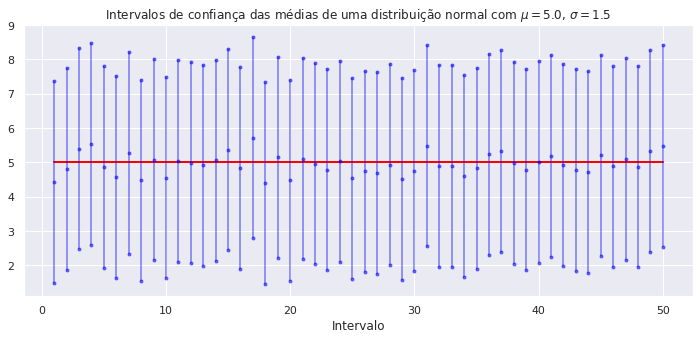

In [80]:
fig, ax = plt.subplots(figsize=(12,5))
y = [5.0 for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y,c='red',lw=2)
for i in intervalos:
    ypoints = [n_intervalos_normal[i-1][0], np.mean(n_intervalos_normal[i-1]), n_intervalos_normal[i-1][1]]
    ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)
ax.set_title("Intervalos de confiança das médias de uma distribuição normal com $\mu={}$, $\sigma={}$".format(5.0, 1.5))
ax.set_xlabel("Intervalo");

**5. Um fabricante de equipamentos seleciona aleatoriamente $1200$ unidades e verifica que 8 têm defeito**

- 5.1 Construa um intervalo de confiança de 95% para a proporção de unidades com defeito

- 5.2 Há evidências para suportar a afirmação de que a fração de peças com defeito é menor que 1%?